In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from matplotlib import pyplot as plt


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0

test_images = test_images / 255.0

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3132 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2582 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2483 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3354 - accuracy: 0.8816

Test accuracy: 0.881600022315979


In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

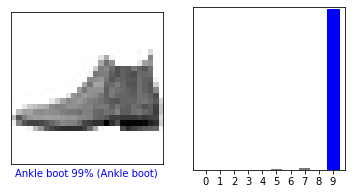

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [31]:
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

In [32]:
predictions_single

array([[5.5943736e-05, 8.9663567e-14, 9.9610645e-01, 6.5279021e-13,
        3.7357125e-03, 1.4042599e-13, 1.0188262e-04, 1.5484771e-16,
        1.5607942e-09, 6.4276004e-14]], dtype=float32)